# Loan Score Prediction Model

In [1]:

import pandas as pd
import xgboost as xg
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

# Load datasets
test_data_1 = pd.read_csv('Test data.xlsx - Query result.csv', encoding='latin1')
test_data_2 = pd.read_csv('Model test data.csv', encoding='latin1')
loan_status_data = pd.read_csv('Loan Status prediction data.xlsx - Query result.csv', encoding='latin1')

# Display the first few rows of each dataframe
print("Test Data 1:")
print(test_data_1.head())
print("\nTest Data 2:")
print(test_data_2.head())
print("\nLoan Status Data:")
print(loan_status_data.head())


Test Data 1:
  org_id    user_id  loan_id  status_id gender marital_status no_of_dependent  \
0      2  1,126,798  150,799          5   Male        Married               2   
1      2  1,663,320  185,838          5   Male         Single               0   
2      8  1,263,148  148,033          2   Male         Single               0   
3     16    715,401  154,780          2   Male         Single               0   
4      4  1,144,408  142,044          2    NaN         Single               0   

   type_of_residence         educational_attainment employment_status  ...  \
0          Own House  BSc, HND and Other Equivalent     Self Employed  ...   
1  Parents Apartment  BSc, HND and Other Equivalent     Self Employed  ...   
2   Rented Apartment  BSc, HND and Other Equivalent     Self Employed  ...   
3   Rented Apartment  BSc, HND and Other Equivalent          Employed  ...   
4   Rented Apartment  BSc, HND and Other Equivalent     Self Employed  ...   

            last_account emails

In [3]:

# Data preprocessing steps
def preprocess_data(df):
    # Example preprocessing steps
    # Handle missing values
    df = df.fillna(method='ffill')

    # Encode categorical variables
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column].astype(str))
    
    return df

# Preprocess the datasets
test_data_1 = preprocess_data(test_data_1)
test_data_2 = preprocess_data(test_data_2)
loan_status_data = preprocess_data(loan_status_data)

# Display the first few rows of the preprocessed data
print("Preprocessed Test Data 1:")
print(test_data_1.head())
print("\nPreprocessed Test Data 2:")
print(test_data_2.head())
print("\nPreprocessed Loan Status Data:")
print(loan_status_data.head())


/tmp/ipykernel_1049/2161322046.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_1049/2161322046.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_1049/2161322046.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Preprocessed Test Data 1:
   org_id  user_id  loan_id  status_id  gender  marital_status  \
0      14      405     1476          5       1               1   
1      14     2573     3945          5       1               3   
2     103     1063     1264          2       1               3   
3      13     3550     1756          2       1               3   
4      97      488      866          2       1               3   

   no_of_dependent  type_of_residence  educational_attainment  \
0                2                  0                       1   
1                0                  1                       1   
2                0                  2                       1   
3                0                  2                       1   
4                0                  2                       1   

   employment_status  ...  last_account  emails  phone_numbers  logins  \
0                  3  ...           187       1              1      12   
1                  3  ...          131

Classification Report:
              precision    recall  f1-score   support

           2       0.84      0.99      0.91      2975
           5       0.10      0.01      0.01       580

    accuracy                           0.83      3555
   macro avg       0.47      0.50      0.46      3555
weighted avg       0.72      0.83      0.76      3555



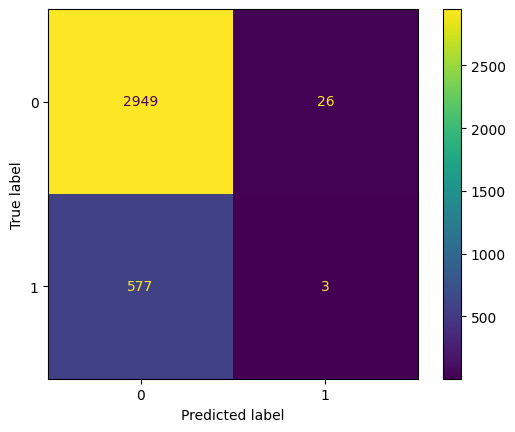

In [4]:

# Example model training and evaluation
X = loan_status_data.drop('status_id', axis=1)
y = loan_status_data['status_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
